# Data Quality class notes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
features = iris[[col for col in iris if col != 'species']]

In [6]:
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Normalization

- The process of rescaling real values numeric attributes into the range 0 and 1

### Review: `MinMaxScalar`

In [10]:
from sklearn.preprocessing import MinMaxScaler

minmax = pd.DataFrame(
    data = MinMaxScaler().fit_transform(features),
    columns = features.columns
)

minmax.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625,0.067797,0.041667


In [12]:
minmax['sepal_length'].describe()

count    150.000000
mean       0.428704
std        0.230018
min        0.000000
25%        0.222222
50%        0.416667
75%        0.583333
max        1.000000
Name: sepal_length, dtype: float64

`Normalizer`
- Rescales values in each column into the range [0,1] without regards to mean or standard deviation

In [13]:
from sklearn.preprocessing import Normalizer

normal = pd.DataFrame(
    data = Normalizer().fit_transform(features),
    columns = features.columns
)

normal.head(1)


,sepal_length,sepal_width,petal_length,petal_width
0,0.803773,0.551609,0.220644,0.031521


In [14]:
normal['sepal_length'].describe()

count    150.000000
mean       0.751400
std        0.044368
min        0.653877
25%        0.715261
50%        0.754883
75%        0.786912
max        0.860939
Name: sepal_length, dtype: float64

## Standardization

- The process of transforming data such that its distribution has a mean of ~0 and standard deviation of ~1
- In case of multivariate data, this is done fature-wise (i.e., independently for each column of the dataframe)
- For each feature, the mean is subtracted from each value, and the difference is divided by the standard deviation of the feature

`StandardScalar`

In [15]:
from sklearn.preprocessing import StandardScaler

standard = pd.DataFrame(
    data = StandardScaler().fit_transform(features),
    columns = features.columns
)

standard.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444


In [16]:
standard['sepal_length'].describe()

count    1.500000e+02
mean    -4.736952e-16
std      1.003350e+00
min     -1.870024e+00
25%     -9.006812e-01
50%     -5.250608e-02
75%      6.745011e-01
max      2.492019e+00
Name: sepal_length, dtype: float64

## Binarization

### Review: `pd.get_dummies`

In [18]:
pd.get_dummies(iris['species']).head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


### `Binarizer`

- Transforms numeric values above a given threshold to 1
- Transforms numeric values below a given threshold to 0

In [21]:
from sklearn.preprocessing import Binarizer

binary = pd.DataFrame(
    data = Binarizer(threshold = 2).fit_transform(features),
    columns = features.columns
)

binary.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,1.0,1.0,0.0,0.0


## Polynomical Regression

- Used to increase complexity by adding powers of the original features as new features
- For example, we can coerce a regression model from linear (y = mc + b) to quadratic (ax^2 + bx + c = 0)


### `PolynomialFeatures`

- Converts features `[a, b, c]` to `[1, a, b, c, a^2, b^2, c^2, ab, bc, ca]`

In [22]:
features.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [24]:
from sklearn.preprocessing import PolynomialFeatures

PolynomialFeatures().fit_transform(features)[:1]

array([[ 1.  ,  5.1 ,  3.5 ,  1.4 ,  0.2 , 26.01, 17.85,  7.14,  1.02,
        12.25,  4.9 ,  0.7 ,  1.96,  0.28,  0.04]])

## Logarithmic Transformation

- Used to reshape exponential distribution to linear distribution (or vice versa)

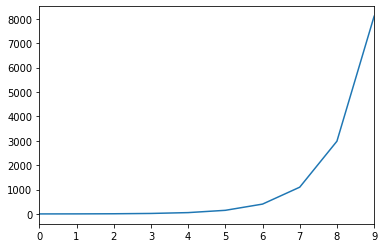

In [25]:
exponential = pd.Series([np.exp(x) for x in range(10)])
exponential.plot()

## `np.exp()`

- Returns e^x (the natural exponential value of x)

In [26]:
e = np.exp(1)
e

2.718281828459045

In [27]:
np.exp(3)

20.085536923187668

In [28]:
e ** 3

20.085536923187664

## `np.log`

- Returns the natural logarithm (the power to which e must be raised to equal x)

In [29]:
np.log(e)

1.0

In [30]:
np.log(10)

2.302585092994046

In [31]:
e ** 2.302585092994046

10.000000000000002

## `pd.apply()`

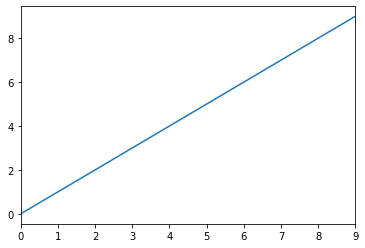

In [32]:
exponential.apply(np.log).plot()

## Review: Interquartile Range

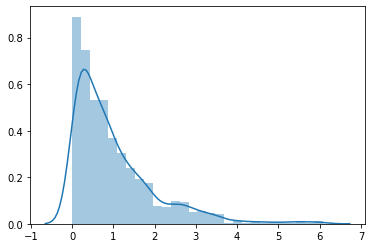

In [34]:
exp_dist = pd.DataFrame({'y' : np.random.exponential(size = 1000)})
sns.distplot(exp_dist)

In [36]:
def interquartile(df, col, k = 1.5):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    whisker = (q3 - q1) * k
    lower_fence = q1 - whisker
    upper_fence = q3 + whisker
    return df.query(f"{lower_fence} < {col} < {upper_fence}")

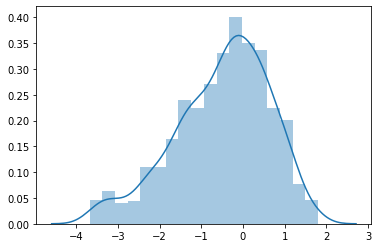

In [38]:
iqr = interquartile(
    exp_dist.apply(np.log),
    'y'
)

sns.distplot(iqr)

## `FunctionTransormer`

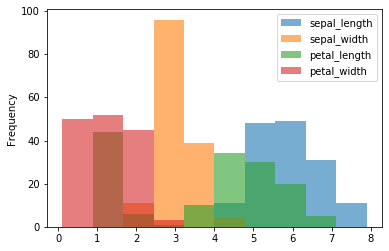

In [39]:
features.plot(kind = 'hist', alpha = .6)

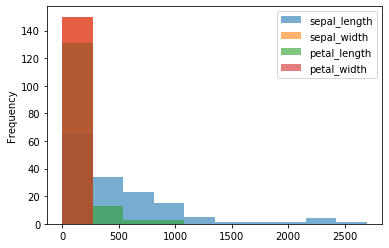

In [41]:
from sklearn.preprocessing import FunctionTransformer

FunctionTransformer(
    np.exp,
    validate = False
).fit_transform(features).plot(kind = 'hist', alpha = .6)

## `PowerTransformer`

- Apply a power transform featurewise (column-wise) to make data more Gaussian-like
- See also `QuantileTransformer`

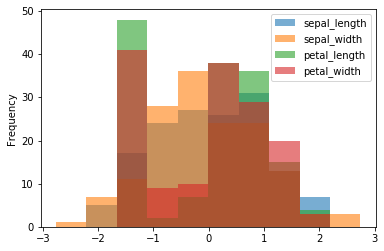

In [42]:
from sklearn.preprocessing import PowerTransformer

power = pd.DataFrame(
    data = PowerTransformer().fit_transform(features),
    columns = features.columns
)

power.plot(kind = 'hist', alpha = .6)